# Evaluation Project - 2 (Agriculture)

### Machine Learning in Agriculture

Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.

Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.


### The Toxic Pesticides
Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

## Problem Statement

We have two data set availble with us for this project i.e. test and train. We will first train our model using test dataset using multiple classfication model since our target variable is a categorical variable. Then we will choose the best model which perfroms best on both test(Splitted data of train dataset) and train.

Then we will use our model to predict the test data set output

## Objective
    
The objective of this project is to buid a model that can determine the outcome of the harvest season, i.e. whether the crop would be (0 = 'Healthy & Alive'), (1 = 'Damaged due to other reasons') and (2 = 'Damaged due to Pesticides').

In [1]:
#Let's load the necessary Libraries

#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

#Data Visualziation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Suppress warnings for a clean notebook
import warnings
warnings.filterwarnings('ignore')

#Print all the librares are loaded successfully
print('All the Libraries are Loaded Successfully')

All the Libraries are Loaded Successfully


In [2]:
#Let's load the Data Set of Agriculture

agri=pd.read_excel('C:/Users/Shubhham/Downloads/Data Trained/Agriculture/train_agriculture.xlsx')
print('Agriculture dataset has been loaded successfully')

Agriculture dataset has been loaded successfully


In [3]:
#Let's check the dataset

agri.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


## Data Description

__Column Name__ :  Description

__Id__:  UniqueID

__Estimated_Insects_Count__:  Estimated insects count per square meter

__Crop_Type__:  Category of Crop(0,1)

__Soil_Type__:  Category of Soil (0,1)

__Pesticide_Use_Category__: Type of pesticides uses (1- Never,
2-Previously Used, 3-Currently Using)

__Number_Doses_Week__:  Number of doses per week

__Number_Weeks_Used__:  Number of weeks used

__Number_Weeks_Quit__:  Number of weeks quit

__Season__:  Season Category (1,2,3)

__Crop_Damage__:  Crop Damage Category (0=alive, 1=Damage due to other 
causes, 2=Damage due to Pesticides)

# Featured Engineering

### Data Preprocessing

In [4]:
#Let's check the shape of our DataSet

agri.shape

(4599, 10)

We have 4599 rows and 10 columns in our Agriculture DataSet

In [5]:
#Let's check the value counts in each columns

for i in agri.columns:
    print(agri[i].value_counts())
    print('\n')

F00006801    1
F00007844    1
F00007578    1
F00006802    1
F00004677    1
            ..
F00001531    1
F00006558    1
F00002460    1
F00005970    1
F00001435    1
Name: ID, Length: 4599, dtype: int64


1132    193
1212    187
1385    182
1056    180
1478    177
       ... 
3515      7
151       7
169       4
231       4
4097      2
Name: Estimated_Insects_Count, Length: 71, dtype: int64


0    3565
1    1034
Name: Crop_Type, dtype: int64


0    2407
1    2192
Name: Soil_Type, dtype: int64


2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


20    1211
40     657
30     584
10     537
15     393
5      268
25     263
60     237
50     172
35     101
45      53
0       45
80      36
70      17
55      11
90       5
85       4
65       3
75       1
95       1
Name: Number_Doses_Week, dtype: int64


20.0    209
30.0    194
25.0    165
40.0    133
35.0    128
       ... 
62.0      5
59.0      5
65.0      3
66.0      3
64.0      1
Name: Number_Weeks_Used, Length: 63

In [6]:
#Let's check the numeric columns details

numeric_features=agri.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [7]:
#Let's check the catagorical columns details

catagorical_features=agri.select_dtypes(include=[np.object])
catagorical_features.columns

Index(['ID'], dtype='object')

### Data Cleaning

In [8]:
#Let's check for the null values in our DataSet

agri.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

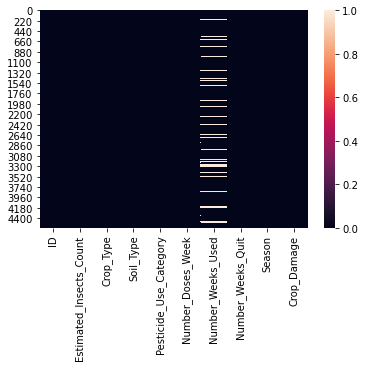

In [9]:
#Let's plot the heat map for null values

sns.heatmap(agri.isnull())
plt.show()

We can observe from the above heat map and null value count that we have 442 null values for Number_Weeks_Used in our dataset

In [10]:
#Let's impute the missing values in our DataSet

for col in ['Number_Weeks_Used']:
    agri[col].fillna(agri[col].mode()[0],inplace=True)

We have imputed the missing values with the mode value of the Number_Weeks_Used

In [11]:
# Let's confirm that we have succesfully imputed the missing values

agri.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

From the above output we can observe that we have successfully imputed the missing values in our DataSet

In [12]:
#Let's check the Data Types of our DataSet

agri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4599 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


### Observations:
    
    1- We have a total of 4599 rows and 10 columns in our dataset
    
    2- There are 3 types of Data Types in our dataset:
        
        i-   object - ID
        ii-  int64 - Estimated_Insects_Count, Crop_Type,
             Soil_Type, Pesticide_Use_Category,
             Number_Doses_Week, Number_Weeks_Quit,
             Season, Crop_Damage
        iii- float64 - Number_Weeks_Used

In [13]:
#Let's convert the flaot64 DataType to int64

agri['Number_Weeks_Used']=agri['Number_Weeks_Used'].astype('int64')

In [14]:
#Let's confirm that we have successfully changed the datatypes

agri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       4599 non-null   object
 1   Estimated_Insects_Count  4599 non-null   int64 
 2   Crop_Type                4599 non-null   int64 
 3   Soil_Type                4599 non-null   int64 
 4   Pesticide_Use_Category   4599 non-null   int64 
 5   Number_Doses_Week        4599 non-null   int64 
 6   Number_Weeks_Used        4599 non-null   int64 
 7   Number_Weeks_Quit        4599 non-null   int64 
 8   Season                   4599 non-null   int64 
 9   Crop_Damage              4599 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 359.4+ KB


We can cleary observe that we have successfully changed the float64 dtype to int64. We have only two dtypes in our dataset i.e. object and int64

### Now our data is ready for Visualization without any missing values

## Exploratory Data Analysis

In [15]:
#Let's check the statistic Matrix

agri.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated_Insects_Count,4599.0,1363.000435,814.439120,150.0,731.0,1212.0,1786.0,4097.0
Crop_Type,4599.0,0.224831,0.417517,0.0,0.0,0.0,0.0,1.0
Soil_Type,4599.0,0.476625,0.499508,0.0,0.0,0.0,1.0,1.0
Pesticide_Use_Category,4599.0,2.283540,0.471978,1.0,2.0,2.0,3.0,3.0
Number_Doses_Week,4599.0,26.477495,15.524647,0.0,15.0,20.0,40.0,95.0
Number_Weeks_Used,4599.0,28.036530,12.249436,0.0,20.0,26.0,36.0,66.0
Number_Weeks_Quit,4599.0,9.205479,9.713253,0.0,0.0,7.0,16.0,47.0
Season,4599.0,1.894325,0.694952,1.0,1.0,2.0,2.0,3.0
Crop_Damage,4599.0,0.194390,0.454597,0.0,0.0,0.0,0.0,2.0


### Observations:
    
    1- Value count in all the columns confirm we do not have
        any missing values.
        
    2 Estimated_Insects_count have the highest standard deviation
      it means the data is spread throuth out and is not clustered
      areound the mean.
    
    3- Mean for all the columns is greater than the median so it
       means  our data is positively skewed except for the Season
       columns as it is negatively skewed.
    
    4- After observing the 75% and 100% we can clearly say that
       Estimated_Insects_Count, Number_Doses_Week, Number_Weeks_Used,
       Number_Weeks_Quit have outliers present in the dataset
       

In [16]:
#Let's check the correlation

agri.corr().style.background_gradient(cmap='coolwarm')

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.422254,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.001181,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093058,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.357684,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099563,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.422254,-0.001181,-0.093058,0.357684,0.099563,1.000000,-0.429923,-0.012550,0.222360
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.429923,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.012550,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.222360,-0.152918,-0.016196,1.000000


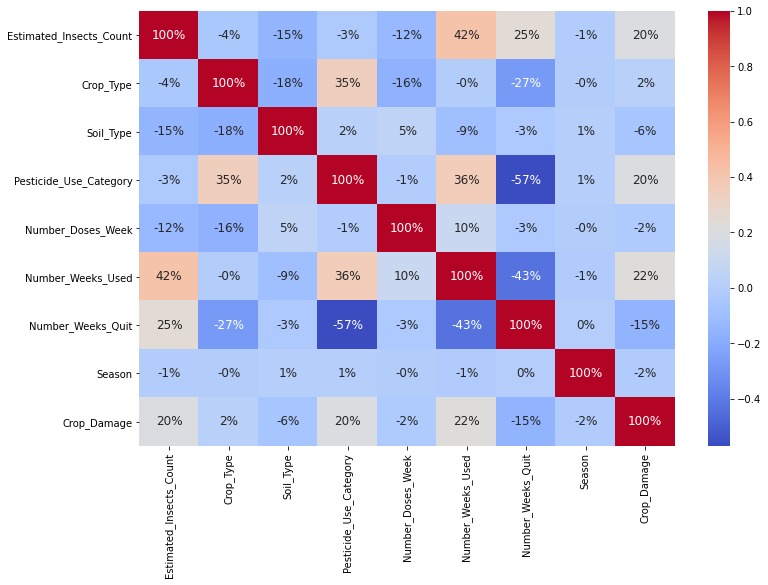

In [17]:
#Let's plot the heat map for the correlation matrix

plt.figure(figsize=(12,8))
sns.heatmap(agri.corr(),annot=True,cmap='coolwarm',annot_kws={"size":12},fmt='0.0%');

### Observations:
    
    1- Number_Weeks_Quit has moderate negative correlation with
       Pesticide_Use-Category and Number_Weeeks_Used.
        
    2- Number_Weeks_Quit has low negative correlation with
       Crop_type and Number_Weeks_Used.
        
    3- Number_Weeks_Used has moderate positive correlation
       with the Estimated_Insetcs_Count and 
       Pesticide_Used_Category.
    
    4- Crop_Type and Pesticide_Used_category has also moderate 
       positive correlation.  

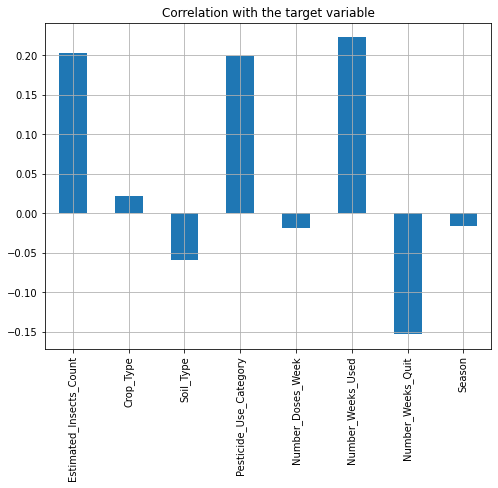

In [18]:
plt.figure(figsize=(8,6))
agri.drop('Crop_Damage',axis=1).corrwith(agri['Crop_Damage']).plot(kind='bar',grid=True)
plt.title("Correlation with the target variable");

### Observations:
    
    1- Number_Weeks_Used is higly correlated with the target variable
       i.e. Crop_Damaged, followd by Estimated_Insetcs_count and
       Pesticide_Used_Category.
    
    2- Soil_Type, Number_Dosees_Weeks and Number_Weeks_Quit has
       negative correlation with the target variable
       i.e. Crop_Damaged  

## Data Visualization

### Univariate Analysis

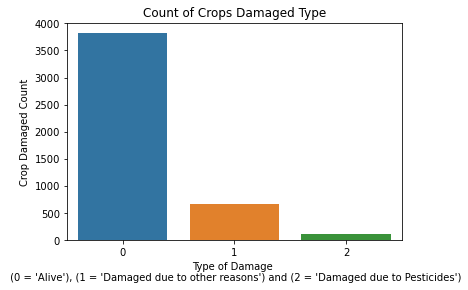

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


In [19]:
#Let's check the Crop Damage Count

plt.subplots(figsize=(6,4))
sns.countplot(x='Crop_Damage',data=agri)
plt.title("Count of Crops Damaged Type")
plt.xlabel("Type of Damage \n (0 = 'Alive'), (1 = 'Damaged due to other reasons') and (2 = 'Damaged due to Pesticides')")
plt.ylabel("Crop Damaged Count")
plt.show()
print(agri['Crop_Damage'].value_counts())

### Observations:
    
    1- Crop alive is 3820
    
    2- Crop Damaged by pesticide is 115 and crop damaged by other
       reasons is 664.
    
    3- Only 2.5% of the total crop is destroyed by the Pesticide

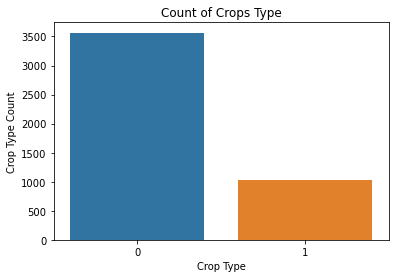

0    3565
1    1034
Name: Crop_Type, dtype: int64


In [20]:
#Let's check the type of crops

plt.subplots(figsize=(6,4))
sns.countplot(x='Crop_Type',data=agri)
plt.title("Count of Crops Type")
plt.xlabel("Crop Type")
plt.ylabel("Crop Type Count")
plt.show()
print(agri['Crop_Type'].value_counts())

 We can observe that the we have only two type of crops in our dataset and type '0' crop is around 75% of the total crop.

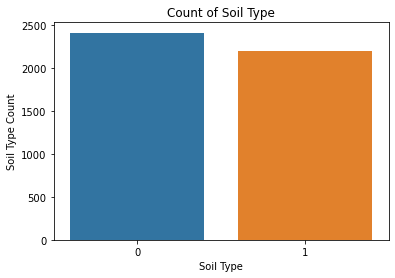

0    2407
1    2192
Name: Soil_Type, dtype: int64


In [21]:
#Let's check the type of soil

plt.subplots(figsize=(6,4))
sns.countplot(x='Soil_Type',data=agri)
plt.title("Count of Soil Type")
plt.xlabel("Soil Type")
plt.ylabel("Soil Type Count")
plt.show()
print(agri['Soil_Type'].value_counts())

We can observe that the we have only two type of Soil in our dataset and type '0' Soil is around 52%

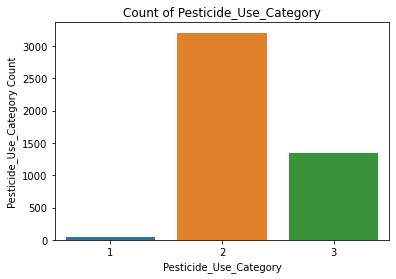

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


In [22]:
#Let's check the types of pesticide

plt.subplots(figsize=(6,4))
sns.countplot(x='Pesticide_Use_Category',data=agri)
plt.title("Count of Pesticide_Use_Category")
plt.xlabel("Pesticide_Use_Category")
plt.ylabel("Pesticide_Use_Category Count")
plt.show()
print(agri['Pesticide_Use_Category'].value_counts())

We can observe that we uses 3 types of pesticide for protection against pest. Type two is the frequenty used pesticide around 70%

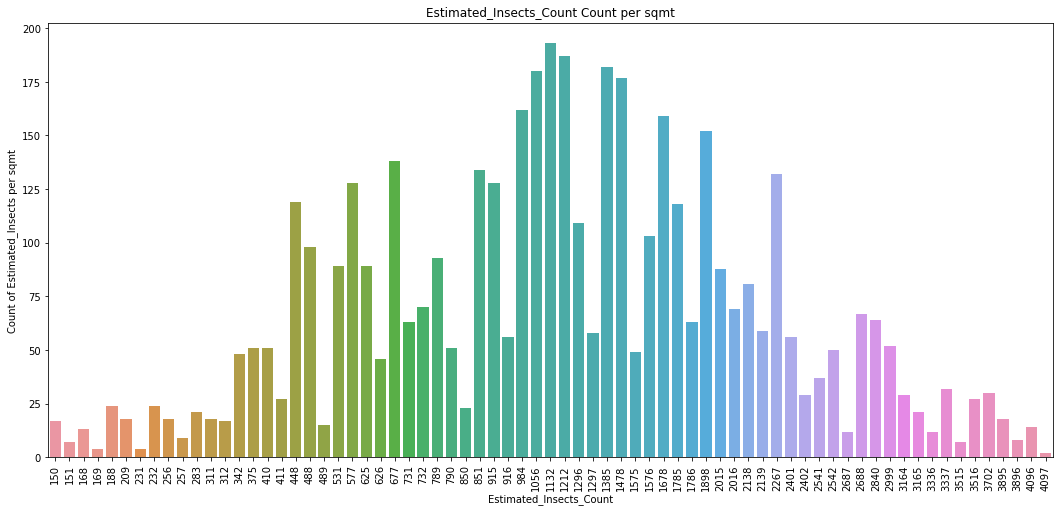

1132    193
1212    187
1385    182
1056    180
1478    177
       ... 
3515      7
151       7
169       4
231       4
4097      2
Name: Estimated_Insects_Count, Length: 71, dtype: int64


In [23]:
#Let's check the number of Estimated Instect count per sqmt.

plt.subplots(figsize=(18,8))
sns.countplot(x='Estimated_Insects_Count',data=agri)
plt.title("Estimated_Insects_Count Count per sqmt")
plt.xlabel("Estimated_Insects_Count")
plt.ylabel("Count of Estimated_Insects per sqmt")
plt.xticks(rotation=90)
plt.show()
print(agri['Estimated_Insects_Count'].value_counts())

We can observe from the graph that the maximum (1132) number of insects per sqmt are 193, 1212 insects per 187 sqmt and so on 

In [24]:
#Let's seprate the crop damages type

crop_damage_alive=agri[agri['Crop_Damage']==0]
crop_damage_other=agri[agri['Crop_Damage']==1]
crop_damage_pesticide=agri[agri['Crop_Damage']==2]

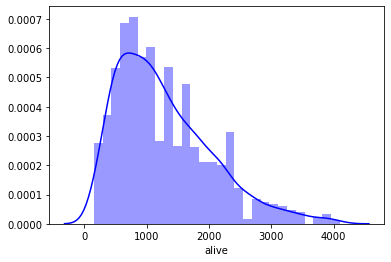

In [25]:
#Let's check the crop alive and Estimated Insect Count

sns.distplot(crop_damage_alive['Estimated_Insects_Count'],color='blue',axlabel='alive');

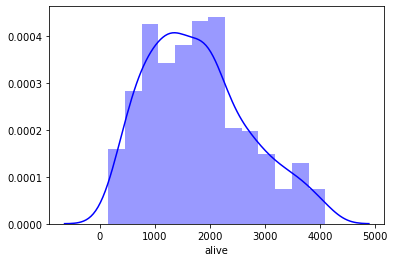

In [26]:
#Let's check the Crop damaged by other and Estimated Insect Count

sns.distplot(crop_damage_other['Estimated_Insects_Count'],color='blue',axlabel='alive');

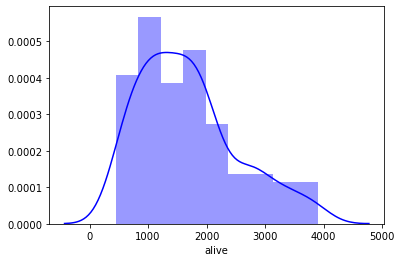

In [27]:
#Let's check the Crop damaged by Pesticide and Estimated Insect Count

sns.distplot(crop_damage_pesticide['Estimated_Insects_Count'],color='blue',axlabel='alive');

Text(0.5, 1.0, 'Plot of crop damage Vs Crop type')

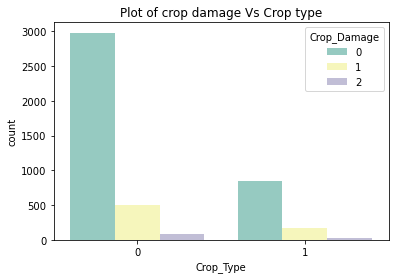

In [28]:
#Let's check the crop type and crop damaged count

sns.countplot(agri['Crop_Type'], hue = agri['Crop_Damage'],palette="Set3")
plt.title("Plot of crop damage Vs Crop type")

 We can observe that in crop type 0 and crop type 1 there is a very huge differnce in the crop that are alive. Crop type 0 has more damaged due to other resons as compared to type 1 crop`1 

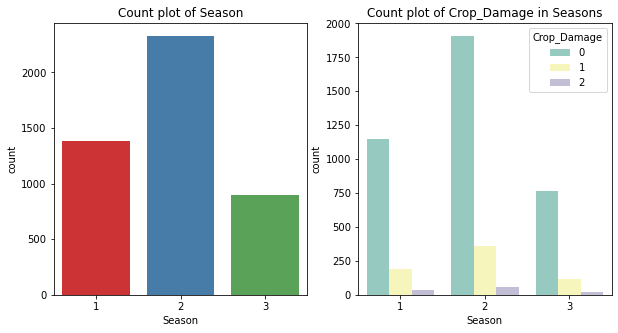

In [29]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(agri['Season'], palette = 'Set1')
plt.title('Count plot of Season')
plt.subplot(1,2,2)
sns.countplot(agri['Season'], hue = agri['Crop_Damage'], palette = 'Set3')
plt.title('Count plot of Crop_Damage in Seasons')
plt.show() 

We can observe that in the type 2 season more crop are alive as compared to other seasons

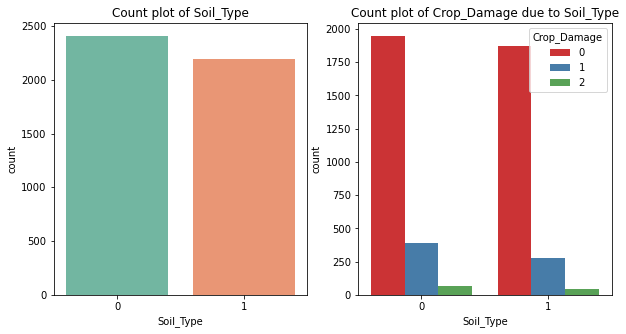

In [30]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(agri['Soil_Type'], palette = 'Set2')
plt.title('Count plot of Soil_Type')
plt.subplot(1,2,2)
sns.countplot(agri['Soil_Type'], hue = agri['Crop_Damage'], palette = 'Set1')
plt.title('Count plot of Crop_Damage due to Soil_Type')
plt.show() 

We can obsereve that there is a very less effect of soil type on the crop damage i.e Alive, Damaged due to pesticde or other reasons

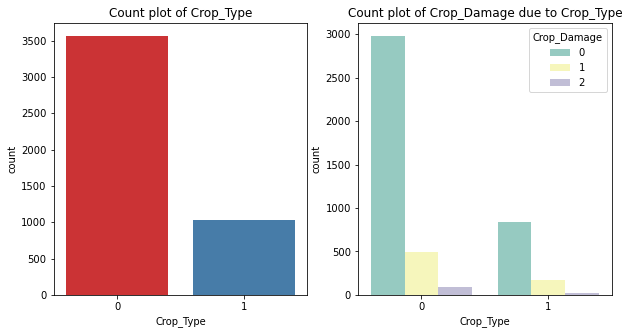

In [31]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(agri['Crop_Type'], palette = 'Set1')
plt.title('Count plot of Crop_Type')
plt.subplot(1,2,2)
sns.countplot(agri['Crop_Type'], hue = agri['Crop_Damage'], palette = 'Set3')
plt.title('Count plot of Crop_Damage due to Crop_Type')
plt.show() 

We can observe crop type has a huge effect on the crop. As crop 0 is more alive as compaed to the crop type 1

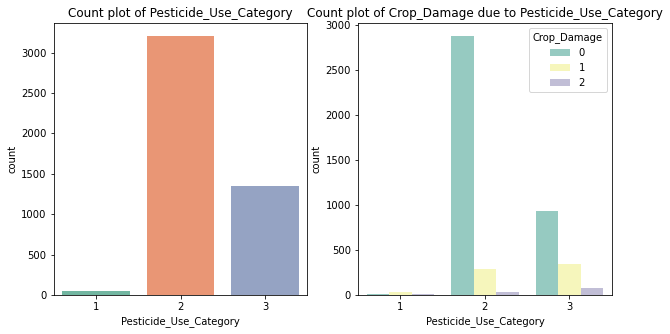

In [32]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(agri['Pesticide_Use_Category'], palette = 'Set2')
plt.title('Count plot of Pesticide_Use_Category')
plt.subplot(1,2,2)
sns.countplot(agri['Pesticide_Use_Category'], hue = agri['Crop_Damage'], palette = 'Set3')
plt.title('Count plot of Crop_Damage due to Pesticide_Use_Category')
plt.show() 

We can observe that the Pesticide used catagiry has type has more bette effect as type 2 pesticide has more crop alive than compared to ther pesticide category

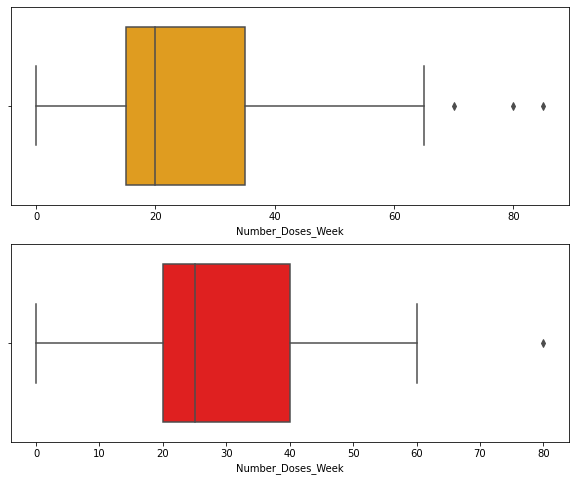

In [33]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.boxplot(crop_damage_other['Number_Doses_Week'],ax=ax1,color='orange')
sns.boxplot(crop_damage_pesticide['Number_Doses_Week'],ax=ax2,color='red')
plt.show()

We can observe that for crop damaged by other reason is positively skewed and crop damaged by pesticide is more more of a normal distribution. Eventhough they both have saome outliers present in our dataset

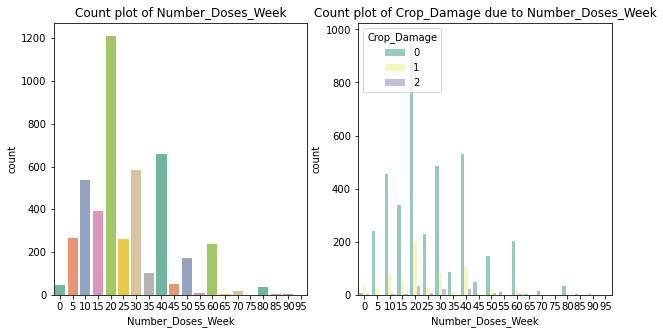

In [34]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(agri['Number_Doses_Week'], palette = 'Set2')
plt.title('Count plot of Number_Doses_Week')
plt.subplot(1,2,2)
sns.countplot(agri['Number_Doses_Week'], hue = agri['Crop_Damage'], palette = 'Set3')
plt.title('Count plot of Crop_Damage due to Number_Doses_Week')
plt.show() 

We can observe that the when the number of pesticide does is 20 per week then more number of crops are alive it mens they are not effected by pest or damaged by pesticide

Text(0, 0.5, 'Number_weeks_quit')

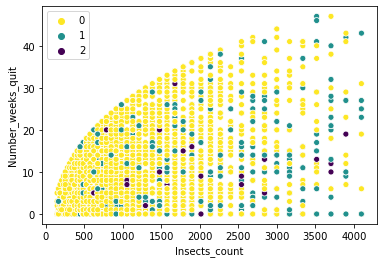

In [35]:
ax=sns.scatterplot(x=agri['Estimated_Insects_Count'].values,y=agri['Number_Weeks_Quit'].values,hue=agri['Crop_Damage'].values,palette='viridis_r')
ax.set_xlabel('Insects_count')
ax.set_ylabel('Number_weeks_quit')

we can observe that as the number of weeks with no pesticide increases then insect count also increases.
As the insect_count increases then crop damage due to other reasons are also increased

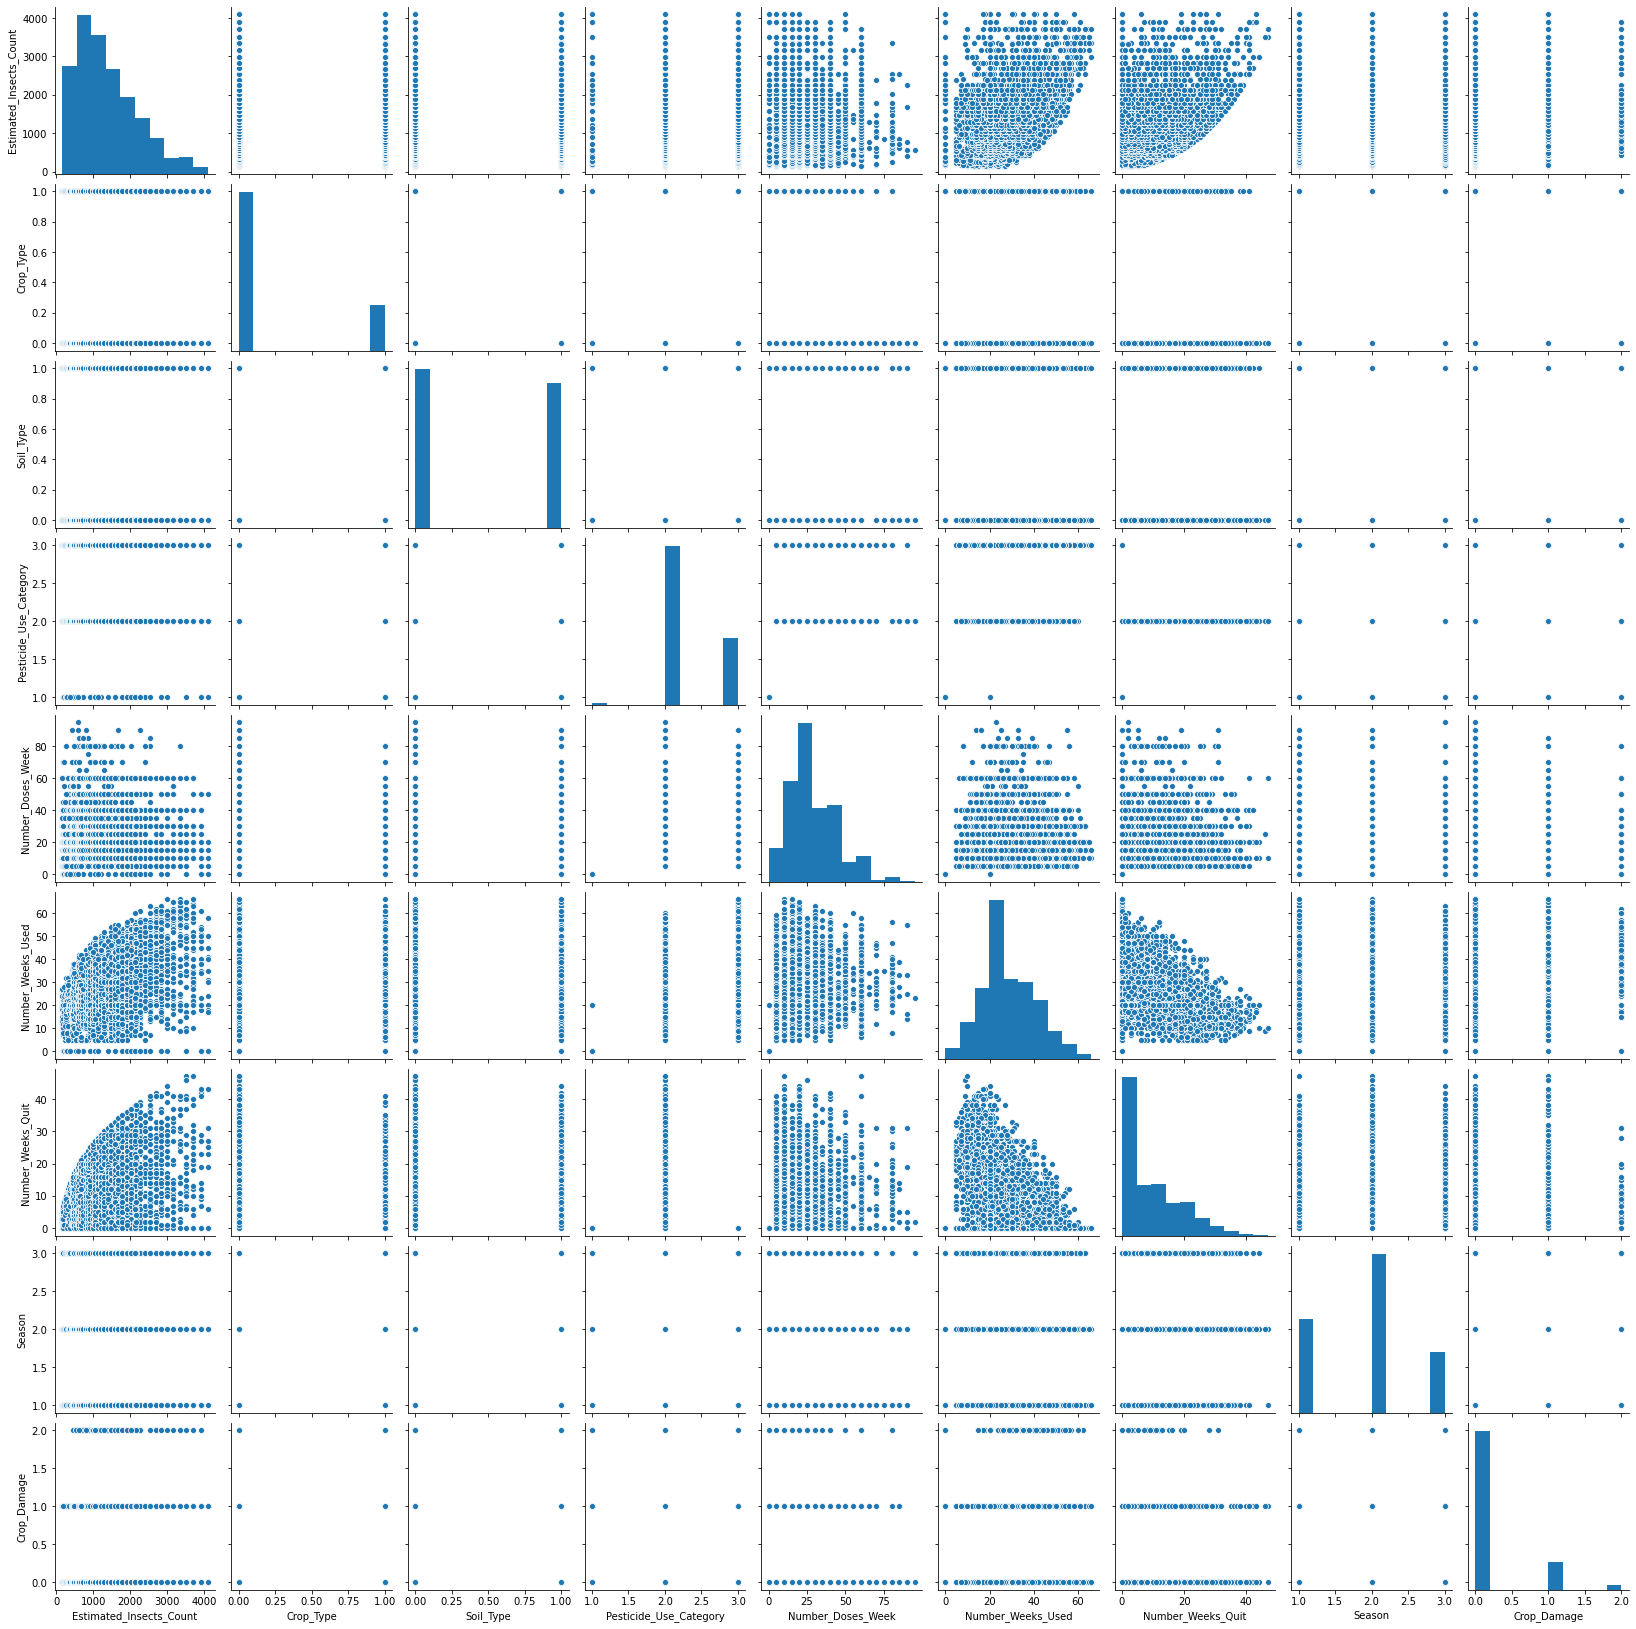

In [36]:
# Let's plot the pair plot

sns.pairplot(agri)
plt.show()

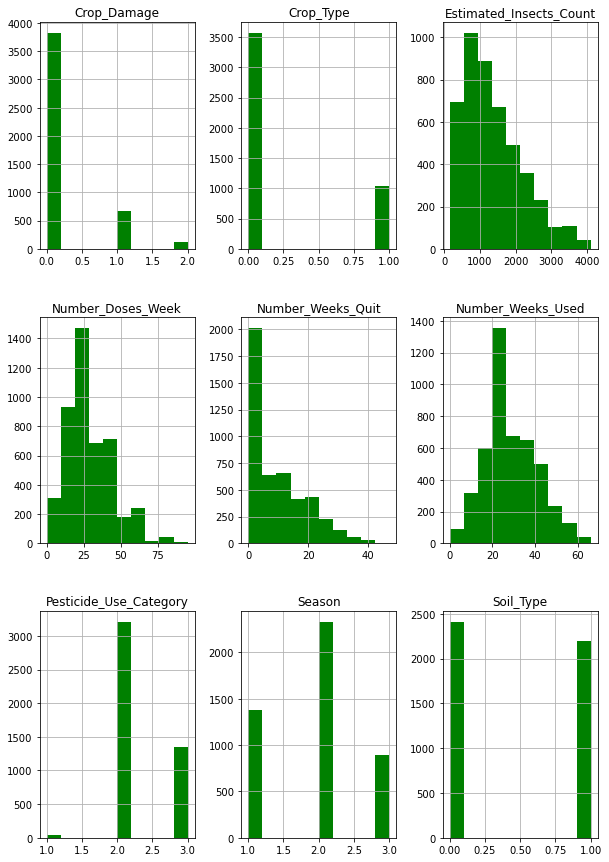

In [37]:
#Let's plot the histogram

agri.hist(figsize=(10,15),color = 'green');

We can Observe most of our features are positively skewed

### Plotting Outliers

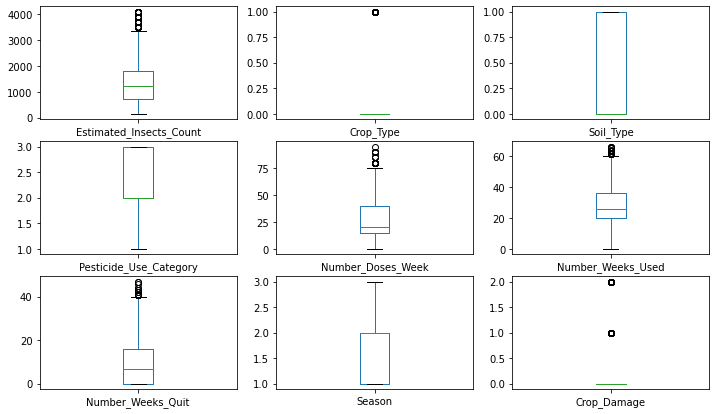

In [38]:
agri.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))
plt.show()

We can observe that there are some outliers in Estimatred Insects Count, Crop Type, Number Does Week, Number Week Used and Crop Damage. We need to treat the outliers

In [39]:
#Let's drop unnecessary colum which is not required for our prediction

agri.drop(['ID'],inplace=True,axis=1)

In [40]:
#Let's check and remove for the outliers

#from scipy.stats import zscore
#z_score=abs(zscore(agri))
#print(agri.shape)
#agri_new=agri.loc[(z_score<3).all(axis=1)]
#print(agri_new.shape)

We have succesfully remove the outliers from our DataSet

In [41]:
#agri=agri_new
#print(agri.shape)

## While removing the outlier the it removes all the columns which containd the values of Crop damaged due to Pesticides ie. Type 2 class for our target variable. So we have decided not to remove the outliers in our dataset.

In [42]:
#Let's check the skewness of our DataSet

agri.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.432681
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [43]:
# Let's treat the skewness

for col in agri.columns:
    if agri[col].skew()>0.55:
        agri[col]=np.log1p(agri[col])

In [44]:
#Let's recheck the skewness of our DataSet

agri.skew()

Estimated_Insects_Count   -0.498606
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.416624
Number_Doses_Week         -1.196764
Number_Weeks_Used          0.432681
Number_Weeks_Quit         -0.199671
Season                     0.144841
Crop_Damage                1.968656
dtype: float64

#### We have successfully treated the skewness of our DataSet

In [45]:
#Let's encode our data using label encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(agri.columns)):
    agri[agri.columns[column]]=le.fit_transform(agri[agri.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)

In [46]:
mappings

[{0: 5.017279836814924,
  1: 5.0238805208462765,
  2: 5.1298987149230735,
  3: 5.135798437050262,
  4: 5.241747015059643,
  5: 5.3471075307174685,
  6: 5.44673737166631,
  7: 5.4510384535657,
  8: 5.54907608489522,
  9: 5.552959584921617,
  10: 5.648974238161206,
  11: 5.7430031878094825,
  12: 5.746203190540153,
  13: 5.8377304471659395,
  14: 5.929589143389895,
  15: 6.018593214496234,
  16: 6.021023349349527,
  17: 6.1070228877422545,
  18: 6.192362489474872,
  19: 6.194405391104672,
  20: 6.2766434893416445,
  21: 6.359573868672378,
  22: 6.439350371100098,
  23: 6.440946540632921,
  24: 6.519147287940395,
  25: 6.595780513961311,
  26: 6.597145701886651,
  27: 6.672032945461067,
  28: 6.673297967767654,
  29: 6.7464121285733745,
  30: 6.747586526829315,
  31: 6.82001636467413,
  32: 6.821107472256465,
  33: 6.892641641172089,
  34: 6.963189985870238,
  35: 7.0326242610280065,
  36: 7.10085190894405,
  37: 7.167809184316444,
  38: 7.168579897264035,
  39: 7.234177179749849,
  40: 7

In [47]:
agri.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,4,1,0,0,0,0,0,0,0
1,5,1,0,0,0,0,0,1,1
2,9,1,0,0,0,0,0,1,1
3,9,1,1,0,0,0,0,1,1
4,13,1,0,0,0,0,0,1,1


## Model Prepration

In [48]:
#Let's split the data into 'x' independent and 'y' dependent variables

x = agri.drop(['Crop_Damage'],axis=1)
y = agri['Crop_Damage']

In [49]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Estimated_Insects_Count  4599 non-null   int64
 1   Crop_Type                4599 non-null   int64
 2   Soil_Type                4599 non-null   int64
 3   Pesticide_Use_Category   4599 non-null   int64
 4   Number_Doses_Week        4599 non-null   int64
 5   Number_Weeks_Used        4599 non-null   int64
 6   Number_Weeks_Quit        4599 non-null   int64
 7   Season                   4599 non-null   int64
dtypes: int64(8)
memory usage: 287.6 KB


We have only one type of Dtype in our dataset i.e. int64 and a total of 4599 rows and 8 columns

In [50]:
#First let's scale our model

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x)
x_train=pd.DataFrame(x_train,columns=x.columns)

In [51]:
#Let's split our model in 70 and 30 ratio for test and train data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def cal_accuracy(y_test, y_predict): 
    
    print("\nConfusion Matrix: \n", 
    confusion_matrix(y_test, y_predict)) 
    
    print("\nClassification Report: \n", 
    classification_report(y_test, y_predict)) 
      
    print (f"\nAccuracy : {accuracy_score(y_test,y_predict)*100:0.2f}%")

In [53]:
#Using GridSearchCV to find the best parameters in Logistic Regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
parameters={'C':[1,10],'random_state':range(42,100)}
log=LogisticRegression()
clf=GridSearchCV(log,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 10, 'random_state': 42}


In [54]:
log=LogisticRegression(C=10, random_state=42)
log.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {log.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {log.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 82.88%
Accuracy of Test Dataset: 83.04%


In [55]:
y_predict=log.predict(x_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[0 0 0 ... 0 0 0]

Confusion Matrix: 
 [[1145    2    0]
 [ 197    1    0]
 [  35    0    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1147
           1       0.33      0.01      0.01       198
           2       0.00      0.00      0.00        35

    accuracy                           0.83      1380
   macro avg       0.39      0.33      0.31      1380
weighted avg       0.74      0.83      0.76      1380


Accuracy : 83.04%


In [56]:
from sklearn import svm
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {svm_linear.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {svm_linear.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 83.04%
Accuracy of Test Dataset: 83.12%


In [57]:
y_predict=svm_linear.predict(x_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[0 0 0 ... 0 0 0]

Confusion Matrix: 
 [[1147    0    0]
 [ 198    0    0]
 [  35    0    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1147
           1       0.00      0.00      0.00       198
           2       0.00      0.00      0.00        35

    accuracy                           0.83      1380
   macro avg       0.28      0.33      0.30      1380
weighted avg       0.69      0.83      0.75      1380


Accuracy : 83.12%


In [58]:
from sklearn import svm
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {svm_rbf.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {svm_rbf.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 83.04%
Accuracy of Test Dataset: 83.12%


In [59]:
y_predict=svm_rbf.predict(x_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[0 0 0 ... 0 0 0]

Confusion Matrix: 
 [[1147    0    0]
 [ 198    0    0]
 [  35    0    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1147
           1       0.00      0.00      0.00       198
           2       0.00      0.00      0.00        35

    accuracy                           0.83      1380
   macro avg       0.28      0.33      0.30      1380
weighted avg       0.69      0.83      0.75      1380


Accuracy : 83.12%


In [60]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "gini", random_state =100,max_depth=3, min_samples_leaf=5)
tree.fit(x_train, y_train)
print(f"Accuracy of Train Dataset: {tree.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {tree.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 83.50%
Accuracy of Test Dataset: 83.91%


In [61]:
y_predict=tree.predict(x_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[0 1 0 ... 0 0 0]

Confusion Matrix: 
 [[1146    1    0]
 [ 186   12    0]
 [  34    1    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1147
           1       0.86      0.06      0.11       198
           2       0.00      0.00      0.00        35

    accuracy                           0.84      1380
   macro avg       0.57      0.35      0.34      1380
weighted avg       0.82      0.84      0.77      1380


Accuracy : 83.91%


In [62]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100)
forest.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {forest.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {forest.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 99.78%
Accuracy of Test Dataset: 82.68%


In [63]:
y_predict=forest.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[0 1 0 ... 0 0 0]

Confusion Matrix: 
 [[1103   40    4]
 [ 157   38    3]
 [  27    8    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1147
           1       0.44      0.19      0.27       198
           2       0.00      0.00      0.00        35

    accuracy                           0.83      1380
   macro avg       0.43      0.38      0.39      1380
weighted avg       0.78      0.83      0.79      1380


Accuracy : 82.68%


In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {gbc.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {gbc.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 86.30%
Accuracy of Test Dataset: 83.70%


In [65]:
y_predict=gbc.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[0 1 0 ... 0 0 0]

Confusion Matrix: 
 [[1124   21    2]
 [ 167   31    0]
 [  27    8    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1147
           1       0.52      0.16      0.24       198
           2       0.00      0.00      0.00        35

    accuracy                           0.84      1380
   macro avg       0.46      0.38      0.38      1380
weighted avg       0.78      0.84      0.79      1380


Accuracy : 83.70%


In [66]:
from sklearn.ensemble import ExtraTreesClassifier
tree_ex=ExtraTreesClassifier(criterion = "entropy", random_state =100,max_depth=3, min_samples_leaf=5)
tree_ex.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {tree_ex.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {tree_ex.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 83.04%
Accuracy of Test Dataset: 83.12%


In [67]:
y_predict=tree_ex.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[0 0 0 ... 0 0 0]

Confusion Matrix: 
 [[1147    0    0]
 [ 198    0    0]
 [  35    0    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1147
           1       0.00      0.00      0.00       198
           2       0.00      0.00      0.00        35

    accuracy                           0.83      1380
   macro avg       0.28      0.33      0.30      1380
weighted avg       0.69      0.83      0.75      1380


Accuracy : 83.12%


In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {knn.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {knn.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 85.00%
Accuracy of Test Dataset: 81.30%


In [69]:
y_predict=knn.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[0 0 0 ... 0 0 0]

Confusion Matrix: 
 [[1094   52    1]
 [ 169   28    1]
 [  28    7    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1147
           1       0.32      0.14      0.20       198
           2       0.00      0.00      0.00        35

    accuracy                           0.81      1380
   macro avg       0.39      0.37      0.36      1380
weighted avg       0.75      0.81      0.77      1380


Accuracy : 81.30%


In [70]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {gnb.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {gnb.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 80.89%
Accuracy of Test Dataset: 81.81%


In [71]:
y_predict=gnb.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[0 0 0 ... 0 0 0]

Confusion Matrix: 
 [[1077   70    0]
 [ 146   52    0]
 [  18   17    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1147
           1       0.37      0.26      0.31       198
           2       0.00      0.00      0.00        35

    accuracy                           0.82      1380
   macro avg       0.41      0.40      0.40      1380
weighted avg       0.77      0.82      0.79      1380


Accuracy : 81.81%


In [72]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {adb.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {adb.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 83.26%
Accuracy of Test Dataset: 83.70%


In [73]:
y_predict=adb.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[0 1 0 ... 0 0 0]

Confusion Matrix: 
 [[1125   22    0]
 [ 168   30    0]
 [  28    7    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1147
           1       0.51      0.15      0.23       198
           2       0.00      0.00      0.00        35

    accuracy                           0.84      1380
   macro avg       0.45      0.38      0.38      1380
weighted avg       0.78      0.84      0.79      1380


Accuracy : 83.70%


In [74]:
models=pd.DataFrame({'Model':['Logistics Regression','SVM_linear','SVM_rbf','Decision Tree','Random Forest','Gradient Boosting','Extra Trees','KNeighbors','GaussianNB','AdaBoost'],
                     'Training Accuracy':[(log.score(x_train,y_train)*100),svm_linear.score(x_train,y_train)*100,svm_rbf.score(x_train,y_train)*100,tree.score(x_train,y_train)*100,forest.score(x_train,y_train)*100,gbc.score(x_train,y_train)*100,tree_ex.score(x_train,y_train)*100,knn.score(x_train,y_train)*100,gnb.score(x_train,y_train)*100,adb.score(x_train,y_train)*100],
                     'Test Accuracy':[(log.score(x_test,y_test)*100),svm_linear.score(x_test,y_test)*100,svm_rbf.score(x_test,y_test)*100,tree.score(x_test,y_test)*100,forest.score(x_test,y_test)*100,gbc.score(x_test,y_test)*100,tree_ex.score(x_test,y_test)*100,knn.score(x_test,y_test)*100,gnb.score(x_test,y_test)*100,adb.score(x_test,y_test)*100]})

models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Test Accuracy
4,Random Forest,99.782541,82.681159
5,Gradient Boosting,86.300093,83.695652
7,KNeighbors,84.995340,81.304348
3,Decision Tree,83.504194,83.913043
9,AdaBoost,83.255669,83.695652
1,SVM_linear,83.038211,83.115942
2,SVM_rbf,83.038211,83.115942
6,Extra Trees,83.038211,83.115942
0,Logistics Regression,82.882883,83.043478
8,GaussianNB,80.894688,81.811594


In [75]:
#Let's check the cross validatation for our models

from sklearn import model_selection
kfold=model_selection.KFold(n_splits=10, random_state=42)
models=[('Logistic Regression', log), ('Support Vector Machine (linear)', svm_linear),('Support Vector Machine (rbf)', svm_rbf),('Decision Tree',tree),
        ('Random Forest',forest),('GradientBoostingClassifier', gbc),('ExtraTreesClassifier', tree_ex),('KNeighborsClassifier', knn),
       ('GaussianNB', gnb),('AdaBoostClassifier', adb)]

for model in models:
    results=model_selection.cross_val_score(model[1],x_train,y_train,cv=kfold,scoring='accuracy')
    print(f"Cross validated Accuracy of {model[0]}: {results.mean()*100:.2f}%")

Cross validated Accuracy of Logistic Regression: 82.73%
Cross validated Accuracy of Support Vector Machine (linear): 83.04%
Cross validated Accuracy of Support Vector Machine (rbf): 83.04%
Cross validated Accuracy of Decision Tree: 83.50%
Cross validated Accuracy of Random Forest: 81.24%
Cross validated Accuracy of GradientBoostingClassifier: 82.60%
Cross validated Accuracy of ExtraTreesClassifier: 83.04%
Cross validated Accuracy of KNeighborsClassifier: 81.64%
Cross validated Accuracy of GaussianNB: 80.96%
Cross validated Accuracy of AdaBoostClassifier: 82.88%


## After evaluating all the models and their cross validation score we can observe that Gradient Boosting Classifier gives the best score of 82.63% and the model is also not suffering from Underfitting anf Overfitting, also performs well on both train as well as test data.

## So, we will choose the Gradient Boosting Classifier Model as our best model

In [76]:
#Let's use GridSearchCV to tune our parameters for GradientBoositngClassifier

from sklearn.model_selection import GridSearchCV

params = {
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'n_estimators':[200],
    }
#params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'criterion':['gini','entropy']}
grid_search_cv = GridSearchCV(GradientBoostingClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   59.1s finished


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'n_estimators': [200]},
             verbose=1)

In [77]:
grid_search_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200,
                           random_state=42)

In [78]:
#Gradient Boosting Classifier with our best result

gbc=GradientBoostingClassifier(learning_rate=0.1, random_state=42, n_estimators=200)
gbc.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {gbc.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {gbc.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 87.60%
Accuracy of Test Dataset: 83.48%


In [79]:
y_predict=gbc.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[0 1 0 ... 0 0 0]

Confusion Matrix: 
 [[1114   31    2]
 [ 159   38    1]
 [  27    8    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1147
           1       0.49      0.19      0.28       198
           2       0.00      0.00      0.00        35

    accuracy                           0.83      1380
   macro avg       0.45      0.39      0.40      1380
weighted avg       0.78      0.83      0.80      1380


Accuracy : 83.48%


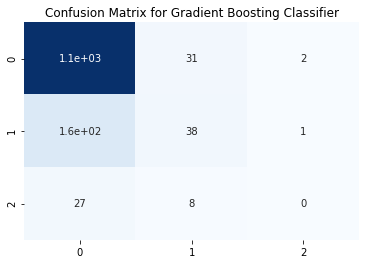

In [80]:
#Let's plot the confusion matrix for the Gradient Boosting Classifier

cm=confusion_matrix(y_test,gbc.predict(x_test))
sns.heatmap(cm,annot=True,cmap='Blues',cbar=False,)

plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()

In [81]:
#Let's save the model

import joblib

#save the model as a pickle in a file
joblib.dump(gbc,'agriculture.pkl')

['agriculture.pkl']

### We have Successfully saved our best model and now we will load the test data and do all the preprocessing and cleaning on our test data and then we will load our saved model from pickle library and apply it on our cleaned test data.

## Load the Test DataSet

In [82]:
#Let's load the Data Set of Agriculture

agri_test=pd.read_excel('C:/Users/Shubhham/Downloads/Data Trained/Agriculture/test_agriculture.xlsx')
print('Agriculture dataset has been loaded successfully')

Agriculture dataset has been loaded successfully


In [83]:
#Let's check the dataset

agri_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [84]:
agri_test.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1
1198,F00003150,1212,0,1,2,15,NaN,20,3


In [85]:
#Let's check the shape of our DataSet

agri_test.shape

(1199, 9)

We have 1199 rows and 9 columns in out test data set. Since it is a test data set so it contains only features and there is no target column in this dataset

In [86]:
#Let's check for the null values in our DataSet

agri_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

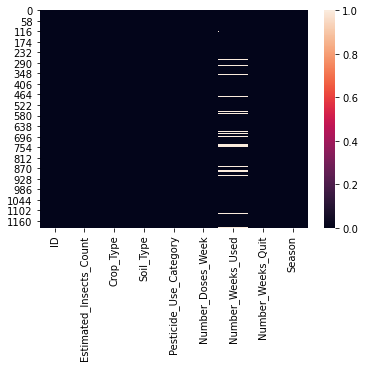

In [87]:
#Let's plot the heat map for null values

sns.heatmap(agri_test.isnull())
plt.show()

We can observe that we have null values in our dataset (Number Weeks Used)

In [88]:
#Let's impute the missing values in our DataSet

for col in ['Number_Weeks_Used']:
    agri_test[col].fillna(agri_test[col].mode()[0],inplace=True)

In [89]:
#Let's drop unnecessary colum which is not required for our prediction

agri_test.drop(['ID'],inplace=True,axis=1)

In [90]:
#Let's check the Data Types of our DataSet

agri_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  1199 non-null   int64  
 1   Crop_Type                1199 non-null   int64  
 2   Soil_Type                1199 non-null   int64  
 3   Pesticide_Use_Category   1199 non-null   int64  
 4   Number_Doses_Week        1199 non-null   int64  
 5   Number_Weeks_Used        1199 non-null   float64
 6   Number_Weeks_Quit        1199 non-null   int64  
 7   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 75.1 KB


### Observations:
    
    1- We have a total of 1199 rows and 9 columns in our test
       dataset
    
    2- There are 3 types of Data Types in our dataset:
        
        i-   object - ID
        ii-  int64 - Estimated_Insects_Count, Crop_Type,
             Soil_Type, Pesticide_Use_Category,
             Number_Doses_Week, Number_Weeks_Quit,
             Season,
        iii- float64 - Number_Weeks_Used

In [91]:
#Let's convert the flaot64 DataType to int64

agri_test['Number_Weeks_Used']=agri_test['Number_Weeks_Used'].astype('int64')

In [92]:
#Let's confirm that we have successfully changed the datatypes

agri_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Estimated_Insects_Count  1199 non-null   int64
 1   Crop_Type                1199 non-null   int64
 2   Soil_Type                1199 non-null   int64
 3   Pesticide_Use_Category   1199 non-null   int64
 4   Number_Doses_Week        1199 non-null   int64
 5   Number_Weeks_Used        1199 non-null   int64
 6   Number_Weeks_Quit        1199 non-null   int64
 7   Season                   1199 non-null   int64
dtypes: int64(8)
memory usage: 75.1 KB


We have successfully converted all the dtypes to int64

In [93]:
agri_test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,20,0,2
1,410,1,1,1,0,0,0,2
2,626,1,0,1,0,0,0,2
3,731,1,0,1,0,0,0,2
4,789,0,0,1,0,0,0,1


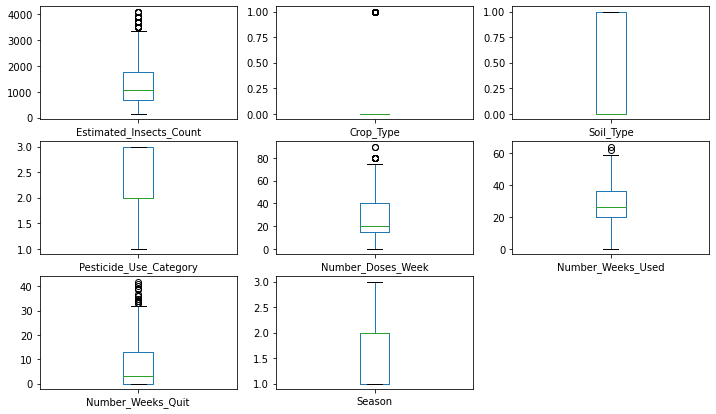

In [94]:
agri_test.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))
plt.show()

In [95]:
#Let's check and remove for the outliers

#from scipy.stats import zscore
#z_score=abs(zscore(agri_test))
#print(agri_test.shape)
#agri_test_new=agri_test.loc[(z_score<3).all(axis=1)]
#print(agri_test_new.shape)

In [96]:
#agri_test=agri_test_new
#print(agri_test.shape)

## While removing the outlier the it removes all the columns which containd the values of Crop damaged due to Pesticides ie. Type 2 class for our target variable. So we have decided not to remove the outliers in our dataset.

In [97]:
#Let's check the skewness of our DataSet

agri_test.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.383855
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

In [98]:
# Let's treat the skewness

for col in agri_test.columns:
    if agri_test[col].skew()>0.55:
        agri_test[col]=np.log1p(agri_test[col])

In [99]:
#Let's recheck the skewness of our DataSet

agri_test.skew()

Estimated_Insects_Count   -0.274855
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week         -1.427895
Number_Weeks_Used          0.383855
Number_Weeks_Quit          0.197853
Season                     0.155872
dtype: float64

We have successfully remvoved the skewness from our dataset

In [100]:
#Let's encode our data using label encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(agri_test.columns)):
    agri_test[agri_test.columns[column]]=le.fit_transform(agri_test[agri_test.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)

In [101]:
mappings

[{0: 5.017279836814924,
  1: 5.0238805208462765,
  2: 5.1298987149230735,
  3: 5.241747015059643,
  4: 5.3471075307174685,
  5: 5.44673737166631,
  6: 5.4510384535657,
  7: 5.54907608489522,
  8: 5.552959584921617,
  9: 5.648974238161206,
  10: 5.7430031878094825,
  11: 5.746203190540153,
  12: 5.8377304471659395,
  13: 5.929589143389895,
  14: 6.018593214496234,
  15: 6.021023349349527,
  16: 6.1070228877422545,
  17: 6.192362489474872,
  18: 6.194405391104672,
  19: 6.2766434893416445,
  20: 6.359573868672378,
  21: 6.439350371100098,
  22: 6.440946540632921,
  23: 6.519147287940395,
  24: 6.595780513961311,
  25: 6.597145701886651,
  26: 6.672032945461067,
  27: 6.673297967767654,
  28: 6.7464121285733745,
  29: 6.747586526829315,
  30: 6.82001636467413,
  31: 6.821107472256465,
  32: 6.892641641172089,
  33: 6.963189985870238,
  34: 7.0326242610280065,
  35: 7.10085190894405,
  36: 7.167809184316444,
  37: 7.168579897264035,
  38: 7.234177179749849,
  39: 7.2991214627108,
  40: 7.3

In [102]:
agri_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Estimated_Insects_Count  1199 non-null   int64
 1   Crop_Type                1199 non-null   int64
 2   Soil_Type                1199 non-null   int64
 3   Pesticide_Use_Category   1199 non-null   int64
 4   Number_Doses_Week        1199 non-null   int64
 5   Number_Weeks_Used        1199 non-null   int64
 6   Number_Weeks_Quit        1199 non-null   int64
 7   Season                   1199 non-null   int64
dtypes: int64(8)
memory usage: 75.1 KB


In [103]:
#Let's assign the value of x and y for test dataset

x_c = agri_test[['Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit','Season']]
print(x_c.shape)

(1199, 8)


In [104]:
#First let's scale our model

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_c)
x_c=pd.DataFrame(x_c,columns=agri_test.columns)

In [105]:
#Let's load the save model from pickle

gbc_test=joblib.load('agriculture.pkl')
gbc_test

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [106]:
gbc_predict=gbc_test.predict(x_c)
gbc_predict

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [107]:
pd.DataFrame(gbc_predict).rename(columns = {0 : 'Crop_Damage'})

,Crop_Damage
0,0
1,1
2,1
3,1
4,2
...,...
1194,0
1195,0
1196,0
1197,0


In [108]:
agri_test_final = pd.read_excel('C:/Users/Shubhham/Downloads/Data Trained/Agriculture/test_agriculture.xlsx')

agri_ID = agri_test_final[['ID']]

agri_test_final = pd.concat([agri_ID, pd.DataFrame(gbc_predict).rename(columns = {0 : 'Crop_Damage'})], axis=1)

agri_test_final

,ID,Crop_Damage
0,F00000002,0
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,2
...,...,...
1194,F00003133,0
1195,F00003135,0
1196,F00003138,0
1197,F00003149,0


In [109]:
agri_test_final['Crop_Damage'].value_counts()

0    1117
1      78
2       4
Name: Crop_Damage, dtype: int64

## From the above output we can clearly observe that:
    
    1- 93% crop is alive
    
    2- 6.5% damaged due to other cause
    
    3- 0.33% damaged due to pesticides

In [110]:
agri_test_final.head(10)

,ID,Crop_Damage
0,F00000002,0
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,2
5,F00000015,1
6,F00000016,0
7,F00000019,2
8,F00000025,1
9,F00000026,1


In [111]:
agri_test_final.tail(10)

,ID,Crop_Damage
1189,F00003119,0
1190,F00003120,0
1191,F00003122,0
1192,F00003130,0
1193,F00003131,0
1194,F00003133,0
1195,F00003135,0
1196,F00003138,0
1197,F00003149,0
1198,F00003150,0


### From the above we can clearly observe that our model is performing well on the test data and all the results are visible against the ID

In [112]:
#Let's save the predicted result into the csv file

agri_test_final.to_csv('Agriculture.csv',index=False)

# We have successfully tested our data set and predicted the result on our test dataset.